In [1]:
import datetime
import pandas as pd
from theoEngine import TheoEngine

%matplotlib notebook

In [2]:
underlying_pair = "BTC/USD"
underlying_price = 3400
atm_volatility = .6   # decimal, annualized
interest_rate = 0

theo_engine = TheoEngine(
    underlying_pair=underlying_pair,
    underlying_price=underlying_price,
    atm_volatility=atm_volatility,
    interest_rate=interest_rate
)
theo_engine.build_deribit_options()

Time left: 0.002471509334696854
Calculated greeks for BTC/USD 4250.0 call with expiry 2019-02-08 08:00:00+00:00: delta=4.134936379719067e-14, gamma=3.516126702040414e-15, theta=5.410779478308934e-13
Time left: 0.3860331531703133
Calculated greeks for BTC/USD 20000.0 call with expiry 2019-06-28 08:00:00+00:00: delta=2.475615773804027e-06, gamma=9.366462000548615e-09, theta=5.1107354722825654e-05
Time left: 0.002471509334696854
Calculated greeks for BTC/USD 2500.0 put with expiry 2019-02-08 08:00:00+00:00: delta=-2.764153009165151e-25, gamma=2.3988922420020198e-26, theta=2.6743275506813095e-24
Time left: 0.6353482216634639
Calculated greeks for BTC/USD 1500.0 put with expiry 2019-09-27 08:00:00+00:00: delta=-0.025577990260456044, gamma=3.654486779872838e-05, theta=0.20844296463657486
Time left: 0.13671808467716262
Calculated greeks for BTC/USD 10000.0 put with expiry 2019-03-29 08:00:00+00:00: delta=-0.9999989919745295, gamma=6.6786538391153606e-09, theta=3.3668884498183616e-05
Time left

In [4]:
option_df_dict = {
    'call': {},
    'put': {}
}
for expiry in theo_engine.expirations:
    for call_put in ['call','put']:
        option_df_dict[call_put][expiry] = {}
    for strike in theo_engine.strikes[expiry]:
        for call_put in ['call','put']:
            option_df_dict[call_put][expiry][strike] = pd.DataFrame(columns=['Theo','Delta','Gamma','Theta'])

lower_underlying_price = 2000
upper_underlying_price = 6000
increment=25
for price in range(lower_underlying_price, upper_underlying_price, increment):
    print("Calculating greeks for underlying price=" + str(price) + "...")
    theo_engine.update_underlying_price(price)
    for expiry in theo_engine.expirations:
        for strike in theo_engine.strikes[expiry]:
            for call_put in ['call','put']:
                option = theo_engine.options[call_put][expiry][strike]
                option_df_dict[call_put][expiry][strike].loc[price] = [option.theo, option.delta, option.gamma, option.theta]

Calculating greeks for underlying price=2000...
Calculating greeks for underlying price=2025...
Calculating greeks for underlying price=2050...
Calculating greeks for underlying price=2075...
Calculating greeks for underlying price=2100...
Calculating greeks for underlying price=2125...
Calculating greeks for underlying price=2150...
Calculating greeks for underlying price=2175...
Calculating greeks for underlying price=2200...
Calculating greeks for underlying price=2225...
Calculating greeks for underlying price=2250...
Calculating greeks for underlying price=2275...
Calculating greeks for underlying price=2300...
Calculating greeks for underlying price=2325...
Calculating greeks for underlying price=2350...
Calculating greeks for underlying price=2375...
Calculating greeks for underlying price=2400...
Calculating greeks for underlying price=2425...
Calculating greeks for underlying price=2450...
Calculating greeks for underlying price=2475...
Calculating greeks for underlying price=

In [9]:
def plot_by_strike(option_df_dict, expiry, variable):
    for call_put in ['call','put']:
        strike = list(option_df_dict[call_put][expiry])[0]
        title= str(expiry) + " " + call_put + "s"
        is_first = True
        for strike in list(option_df_dict[call_put][expiry]):
            df = option_df_dict[call_put][expiry][strike].copy()
            df.columns = [x + "_" + str(strike) for x in df.columns]
            if is_first:
                ax = df.plot(y=[variable + "_" + str(strike)], title=title)
                ax.set_xlabel = "Underlying price (" + underlying_pair.split('/')[1] + ")"
                ax.set_ylabel = variable
                is_first = False
            else:
                df.plot(y=[variable + "_" + str(strike)], ax=ax)

<IPython.core.display.Javascript object>


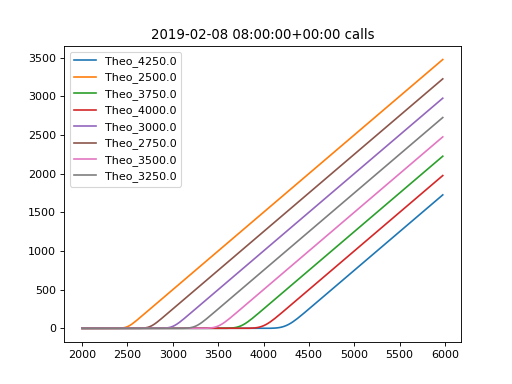

<IPython.core.display.Javascript object>


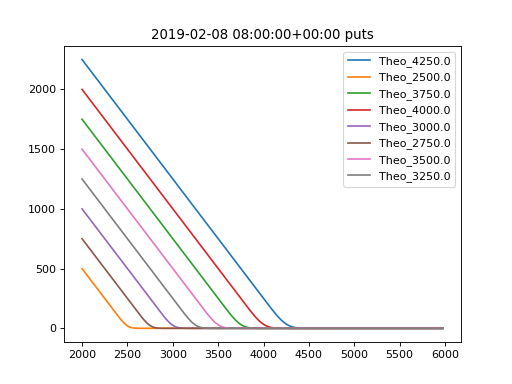

<IPython.core.display.Javascript object>


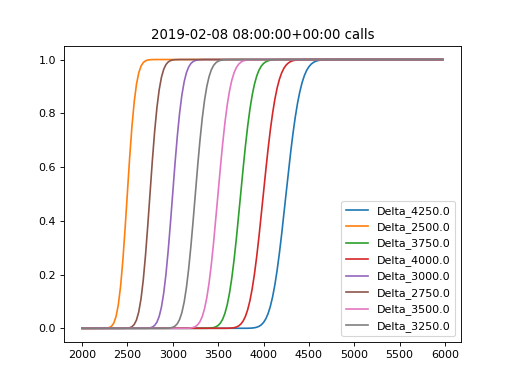

<IPython.core.display.Javascript object>


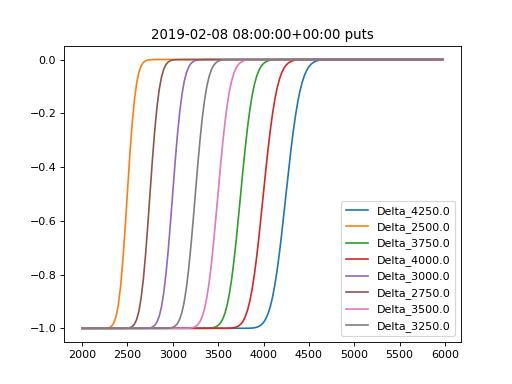

<IPython.core.display.Javascript object>


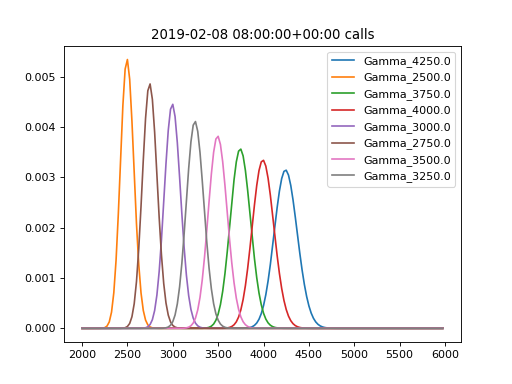

<IPython.core.display.Javascript object>


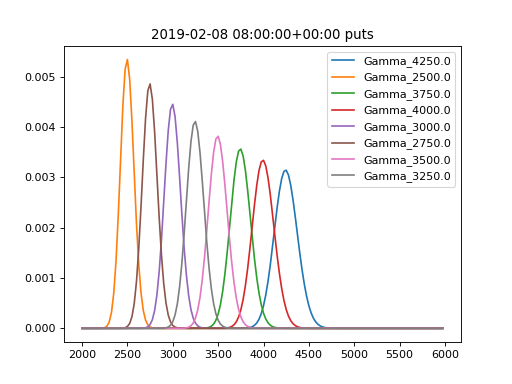

<IPython.core.display.Javascript object>


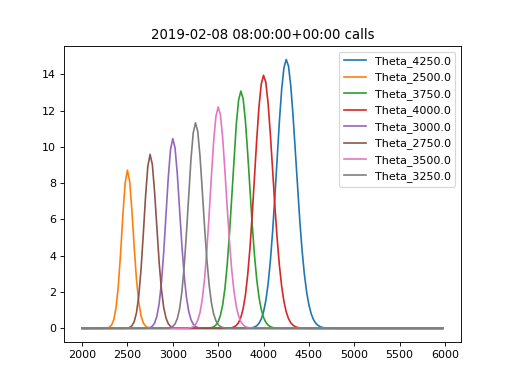

<IPython.core.display.Javascript object>


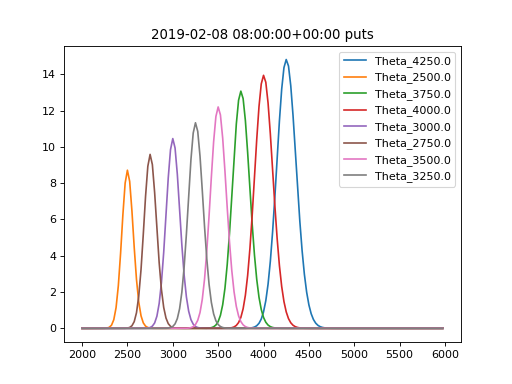

In [10]:
expiry = theo_engine.expirations[0]
plot_by_strike(option_df_dict, expiry, 'Theo')
plot_by_strike(option_df_dict, expiry, 'Delta')
plot_by_strike(option_df_dict, expiry, 'Gamma')
plot_by_strike(option_df_dict, expiry, 'Theta')